# Optimizers from Scratch

Using the ever excellent [tutorial](https://ruder.io/optimizing-gradient-descent/) by Sebastian Ruder and some help in code structure from [Pytorch Optim Library](https://github.com/pytorch/pytorch/tree/master/torch/optim), we write some popular optimzers from scratch in Python.  
  
Our Optimizer Code lives in ```Optimizers.py``` and Linear REgression model and gradient/loss computation implemented in ```Models.py```

In [1]:
from Models import LinearRegression, dummy_data_gen
from Optimizers import GradientDescent, Adam, SGDM, Adagrad, Adadelta, RMSProp
from collections import OrderedDict
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from sandbox import run_models
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [7]:
#Synthetic Data with variance of each feature a random value between 0 and 10, following a normal distribution
synthetic_betas = [3, 1, 5, 9, 4]
X, y = dummy_data_gen(betas=synthetic_betas,noise_var=0.8,data_size=1000,std_range=20)
dont_run = []
lrdict = {}
res0,hist0 = run_models(X,y,lrdict,batch_size=50, dont_run=dont_run, epochs=100)
res0[['opt', 'loss', 'train_r2', 'test_r2']]

# Non adaptive methods never converge without LR tuning

Running Optimizer:  GD
Running Optimizer:  SGD
Running Optimizer:  SGDM
Running Optimizer:  Adam
Running Optimizer:  Adagrad
Running Optimizer:  Adadelta
Running Optimizer:  RMSProp


,opt,loss,train_r2,test_r2
0,GD,2.637896e+91,-1.185010e+90,-1.140588e+90
1,SGD,NaN,NaN,NaN
2,SGDM,NaN,NaN,NaN
3,Adam,4.186049e-02,1.000000e+02,1.000000e+02
4,Adagrad,4.378160e+03,5.656000e+01,5.643000e+01
5,Adadelta,3.951899e+01,9.914000e+01,9.910000e+01
6,RMSProp,3.681078e-01,1.000000e+02,1.000000e+02


In [9]:
#Now tune the Learning Rates so they converge. 
synthetic_betas = [3, 1, 5, 9, 4]
X, y = dummy_data_gen(betas=synthetic_betas,noise_var=5,data_size=1000,std_range=10)
dont_run = []#[ 'Adadelta', 'Adagrad']
lrdict = { 'GD': 0.001, 'SGD': 0.0001, 'SGDM' : 0.0001, 'RMSProp' : 0.001, 'Adagrad' : 0.1 }
res1,hist1 = run_models(X,y,lrdict,batch_size=50, dont_run=dont_run, epochs=100)
#sns.lineplot(x='epoch',y='loss',hue='opt',data=hist1)

Running Optimizer:  GD
Running Optimizer:  SGD
Running Optimizer:  SGDM
Running Optimizer:  Adam
Running Optimizer:  Adagrad
Running Optimizer:  Adadelta
Running Optimizer:  RMSProp


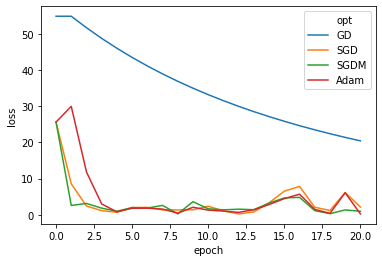

In [10]:
fdata = hist1[(hist1['opt'].isin(['GD', 'SGD', 'SGDM', 'Adam'])) & (hist1.epoch <= 20)]
sns.lineplot(x='epoch',y='loss',hue='opt',data=fdata)
# Adam takes a tad longer to stabilize but catches up pretty fast. 

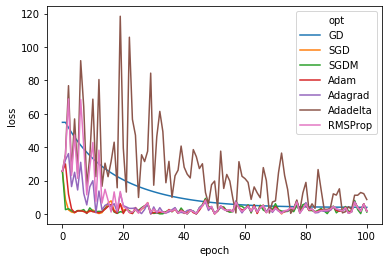

In [11]:
sns.lineplot(x='epoch',y='loss',hue='opt',data=hist1)
# GD too slow. Adadelta takes too long to stabilize. Adam is the best of adaptive. 

In [37]:
#Synthetic Data with all features having variance=1, normally distributed. 
synthetic_betas = [3, 1, 5, 9, 4]
X, y = dummy_data_gen(betas=synthetic_betas,noise_var=0.8,data_size=1000,std_range=10)
dont_run = []#[ 'Adadelta', 'Adagrad']
lrdict = { 'GD': 0.01, 'SGD': 0.0001, 'SGDM' : 0.001, 'RMSProp' : 0.001, 'Adagrad' : 0.001}
res2,hist2 = run_models(X,y,lrdict,batch_size=50, dont_run=dont_run, epochs=100,epoch_loss=False)
#sns.lineplot(x='epoch',y='loss',hue='opt',data=hist1)

Running Optimizer:  GD
Running Optimizer:  SGD
Running Optimizer:  SGDM
Running Optimizer:  Adam
Running Optimizer:  Adagrad
Running Optimizer:  Adadelta
Running Optimizer:  RMSProp


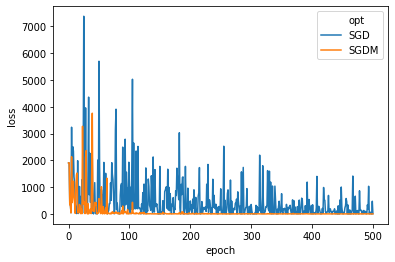

In [39]:
#Compare SGD and SGDM stepwise updates to show choppiness of SGD
fdata2 = hist2[(hist2['opt'].isin(['SGD', 'SGDM'])) & (hist2.epoch <= 500)]
sns.lineplot(x='epoch',y='loss',hue='opt',data=fdata2)

In [3]:
X,y = load_boston(return_X_y=True)
y = y.reshape((506,1))
dont_run = []#[ 'Adadelta', 'Adagrad']
lrdict = {'GD' : 0.000001, 'SGD': 0.000001, 'SGDM': 0.0000005, 'Adam' : 0.001}
res3,hist3 = run_models(X,y,lrdict,batch_size=60, dont_run=dont_run, epochs=1000)


Running Optimizer:  GD
Running Optimizer:  SGD
Running Optimizer:  SGDM
Running Optimizer:  Adam
Running Optimizer:  Adagrad
Running Optimizer:  Adadelta
Running Optimizer:  RMSProp


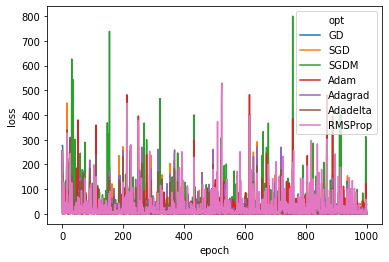

In [113]:
sns.lineplot(x='epoch',y='loss',hue='opt',data=hist3)

In [118]:
res3[['opt', 'loss', 'train_r2', 'test_r2']]

,opt,loss,train_r2,test_r2
0,GD,39.204562,9.75,8.25
1,SGD,0.011597,55.87,50.01
2,SGDM,0.123743,61.43,46.67
3,Adam,0.155116,72.72,60.69
4,Adagrad,0.749508,54.34,45.65
5,Adadelta,0.042151,70.08,60.76
6,RMSProp,4.862111,64.80,48.56


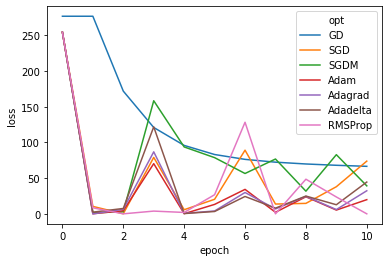

In [4]:
fdata2 = hist3[(hist3.epoch <= 10) & (hist3.epoch >= 0)]
sns.lineplot(x='epoch',y='loss',hue='opt',data=fdata2)

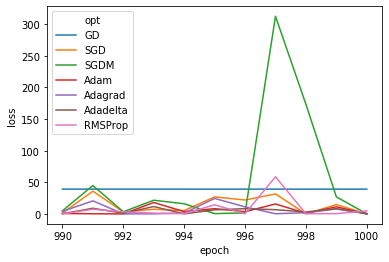

In [5]:
fdata2 = hist3#hist3[hist3['opt'].isin(['Adagrad', 'Adam', 'Adadelta', 'RMSProp'])]
fdata2 = fdata2[(fdata2.epoch <= 1000) & (fdata2.epoch >= 990)]
sns.lineplot(x='epoch',y='loss',hue='opt',data=fdata2)

In [6]:
X,y = load_boston(return_X_y=True)
y = y.reshape((506,1))
dont_run = []
lrdict = {'RMSProp' : 0.001, 'Adagrad' : 0.001, 'Adam' : 0.001 }
res4,hist4 = run_models(X,y,lrdict,batch_size=60, dont_run=dont_run, epochs=1000)
res4[['opt', 'loss', 'train_r2', 'test_r2']]

Running Optimizer:  GD
Running Optimizer:  SGD
Running Optimizer:  SGDM
Running Optimizer:  Adam
Running Optimizer:  Adagrad
Running Optimizer:  Adadelta
Running Optimizer:  RMSProp


,opt,loss,train_r2,test_r2
0,GD,NaN,NaN,NaN
1,SGD,NaN,NaN,NaN
2,SGDM,NaN,NaN,NaN
3,Adam,0.155116,72.72,60.69
4,Adagrad,0.644127,27.13,27.59
5,Adadelta,0.042151,70.08,60.76
6,RMSProp,0.081482,72.77,59.46


In [106]:
#VErify best accuracy analytically
X,y = load_boston(return_X_y=True)
y = y.reshape((506,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LR() 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print( r2 )

0.6687594935356329
